In [1]:
# importing all the required libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data = data.assign(target=pd.Series(cancer.target))
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
## Independent features and dependent features
X=data.iloc[:,:-1]  
y=data.iloc[:,-1]

In [7]:
## train test split 
from sklearn.model_selection import train_test_split

# Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [9]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l2'],'C':[1,2],'max_iter':[10000]}

In [10]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
LogReg = GridSearchCV(estimator = classifier,
                  param_grid = parameter,
                  scoring = "accuracy", #sklearn.metrics.SCORERS.keys()
                  cv = 5,
                  verbose = 4)

In [11]:
LogReg.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] C=1, max_iter=10000, penalty=l2 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=1, max_iter=10000, penalty=l2, score=0.977, total=   0.6s
[CV] C=1, max_iter=10000, penalty=l2 .................................
[CV] ..... C=1, max_iter=10000, penalty=l2, score=0.929, total=   0.6s
[CV] C=1, max_iter=10000, penalty=l2 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ..... C=1, max_iter=10000, penalty=l2, score=0.953, total=   0.6s
[CV] C=1, max_iter=10000, penalty=l2 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] ..... C=1, max_iter=10000, penalty=l2, score=0.965, total=   0.7s
[CV] C=1, max_iter=10000, penalty=l2 .................................
[CV] ..... C=1, max_iter=10000, penalty=l2, score=0.882, total=   0.7s
[CV] C=2, max_iter=10000, penalty=l2 .................................
[CV] ..... C=2, max_iter=10000, penalty=l2, score=0.977, total=   0.7s
[CV] C=2, max_iter=10000, penalty=l2 .................................
[CV] ..... C=2, max_iter=10000, penalty=l2, score=0.941, total=   0.6s
[CV] C=2, max_iter=10000, penalty=l2 .................................
[CV] ..... C=2, max_iter=10000, penalty=l2, score=0.953, total=   0.7s
[CV] C=2, max_iter=10000, penalty=l2 .................................
[CV] ..... C=2, max_iter=10000, penalty=l2, score=0.953, total=   0.7s
[CV] C=2, max_iter=10000, penalty=l2 .................................
[CV] ..... C=2, max_iter=10000, penalty=l2, score=0.894, total=   0.7s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2], 'max_iter': [10000], 'penalty': ['l2']},
             scoring='accuracy', verbose=4)

In [12]:
print(LogReg.best_params_)

{'C': 2, 'max_iter': 10000, 'penalty': 'l2'}


In [13]:
print(LogReg.best_score_)

0.9435841313269494


In [14]:
df = pd.DataFrame(LogReg.cv_results_)
df = df.sort_values("rank_test_score")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.684185,0.028323,0.001277,0.000392,2,10000,l2,"{'C': 2, 'max_iter': 10000, 'penalty': 'l2'}",0.976744,0.941176,0.952941,0.952941,0.894118,0.943584,0.027304,1
0,0.643350,0.047418,0.001616,0.000487,1,10000,l2,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2'}",0.976744,0.929412,0.952941,0.964706,0.882353,0.941231,0.033334,2


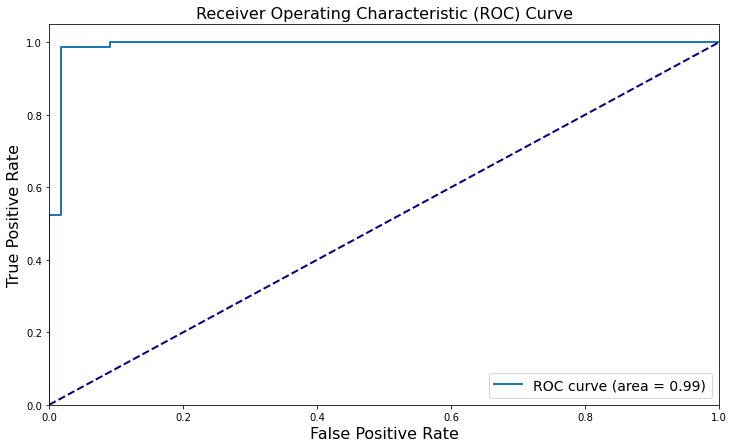

In [15]:
# Compute the predicted probabilities and the ROC curve
y_proba = LogReg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
ax.plot(fpr, tpr, lw=2, label="ROC curve (area = {:.2f})".format(roc_auc))
ax.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate", fontsize=16)
ax.set_ylabel("True Positive Rate", fontsize=16)
ax.set_title("Receiver Operating Characteristic (ROC) Curve", fontsize=16)
ax.legend(loc="lower right", fontsize=14)


In [16]:
##prediction
y_pred=LogReg.predict(x_test)

In [17]:
## accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [18]:
score=accuracy_score(y_pred,y_test)
print(score)

0.986013986013986


In [19]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

